# Stock Analysis and Monte Carlo based Experiments

In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt 

## Part A: Stock Simulation Function
### This section will simulate the price of a stock over a set amount of days.

In [2]:
def simulate_stock(start, rate, vol, days):
    
    daily_yields = np.random.normal(loc=rate/252, scale=vol/(252**0.5), size=days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_mulitipliers = np.exp(cumulative_yields)
    daily_prices = start * daily_mulitipliers
    daily_prices = np.concatenate(([start], daily_prices))
    
    return np.round(daily_prices, 2)

### Here we will test the simulate_stock function.

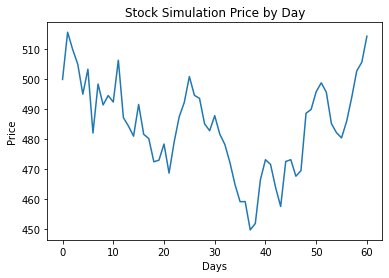

In [3]:
np.random.seed(1)

sim = simulate_stock(500, 0.08, 0.3, 60)

plt.plot(sim)
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Stock Simulation Price by Day')
plt.show()

## Part B: Annual Yield Function
### This section will calculate the annual yield of a simulated run.

In [4]:
def find_yield(run):
    
    annual_yield = mt.log(run[-1] / run[0]) * (252 / (len(run)-1))
    
    return np.round(annual_yield, 4)

### Here I will test this function on the simulation from Part A.

In [5]:
find_yield(sim)

0.1196

### The next cell will explore the potential variability over 25 runs.

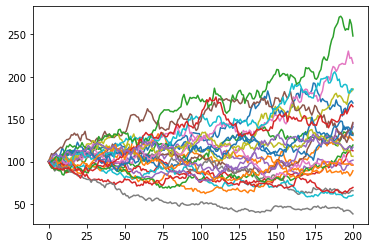

In [6]:
find = []
for i in range(25):
    
    test = simulate_stock(100, 0.06, 0.4, 200)
    find.append(find_yield(test))
    plt.plot(test)
    
plt.show()

### Here I will show the yields for the 25 simulated lists.

In [7]:
print(find)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978]


## Part C: Finding Seeds that Generate Specific Outcomes
### This section covers the use of seeds to find known values.

### In the cell below, Stock A has the highest simulated final price.

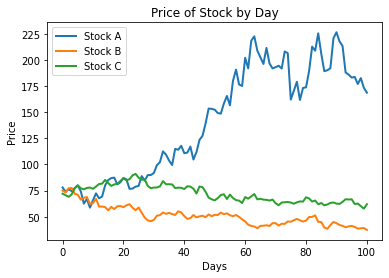

In [8]:
np.random.seed(20030320)

stock_a1 = simulate_stock(78, 0.04, 1.2, 100)
stock_b1 = simulate_stock(75, 0.08, 0.8, 100)
stock_c1 = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(stock_a1, lw=2, label='Stock A')
plt.plot(stock_b1, lw=2, label='Stock B')
plt.plot(stock_c1, lw=2, label='Stock C')

plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Price of Stock by Day')
plt.show()


### In the cell below, Stock B has the highest simulated final price.

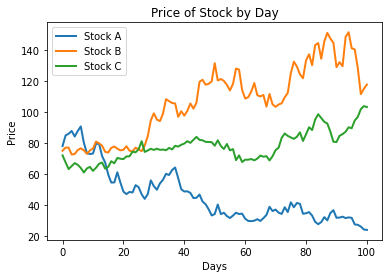

In [9]:
np.random.seed(19850418)

stock_a2 = simulate_stock(78, 0.04, 1.2, 100)
stock_b2 = simulate_stock(75, 0.08, 0.8, 100)
stock_c2 = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(stock_a2, lw=2, label='Stock A')
plt.plot(stock_b2, lw=2, label='Stock B')
plt.plot(stock_c2, lw=2, label='Stock C')

plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Price of Stock by Day')
plt.show()

### In the cell below, Stock C has the highest simulated final price.

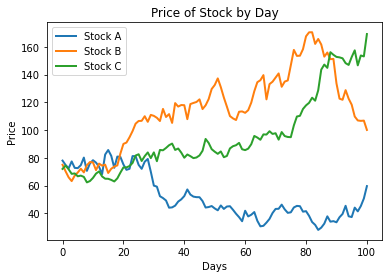

In [10]:
np.random.seed(20090826)

stock_a3 = simulate_stock(78, 0.04, 1.2, 100)
stock_b3 = simulate_stock(75, 0.08, 0.8, 100)
stock_c3 = simulate_stock(72, 0.16, 0.6, 100)

plt.plot(stock_a3, lw=2, label='Stock A')
plt.plot(stock_b3, lw=2, label='Stock B')
plt.plot(stock_c3, lw=2, label='Stock C')

plt.legend()
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Price of Stock by Day')
plt.show()

## Part D: Monte Carlo Simulation
### In this section we will perform numerous simulations to estimate probabilities.

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    
    final_prices =[]
    annual_yields =[]
    
    for i in range(0, num_runs):
        run = simulate_stock(start, rate, vol, days)
        r = run[-1]
        final_prices.append(r)
        q = find_yield(run)
        annual_yields.append(q)
        
    np.asarray(final_prices)
    np.asarray(annual_yields)
    
    return final_prices, annual_yields

### Here we test the Monte Carlo simulation.

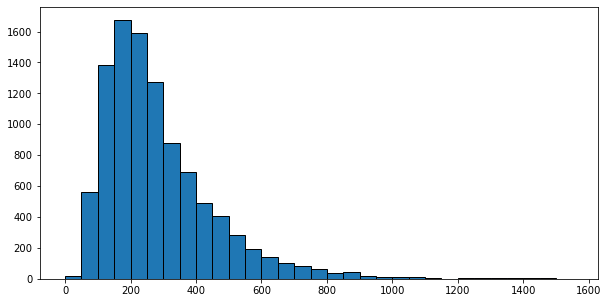

In [12]:
np.random.seed(1)

monte1 = monte_carlo(200, 0.1, 0.4, 500, 10000)

plt.figure(figsize=[10, 5])
plt.hist(monte1[0], bins=np.arange(0, 1600, 50), edgecolor='black')
plt.show()

### This section displays the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [13]:
print('10th percentile:', '{:,.2f}'.format(np.percentile(monte1[0], 10)))
print('25th percentile:', '{:,.2f}'.format(np.percentile(monte1[0], 25)))
print('50th percentile:', '{:,.2f}'.format(np.percentile(monte1[0], 50)))
print('75th percentile:', '{:,.2f}'.format(np.percentile(monte1[0], 75)))
print('90th percentile:', '{:,.2f}'.format(np.percentile(monte1[0], 90)))

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
### This section will show the impact of volatility on stock prices.

In [14]:
np.random.seed(1)

vol_A = monte_carlo(100, 0.12, 0.3, 150, 10000)
vol_B = monte_carlo(100, 0.12, 0.7, 150, 10000)

print('Average Annual Yield for A over 10000 runs:', '{:,.4f}'.format(np.average(vol_A[1])))
print('Average Annual Yield for B over 10000 runs:', '{:,.4f}'.format(np.average(vol_B[1])))

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


### Here we will visually inspect the results from above with a histogram.

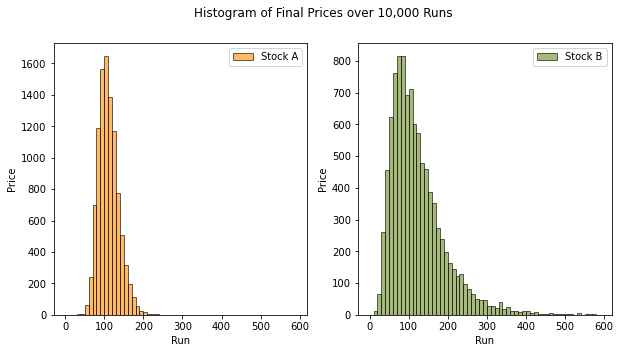

In [15]:
plt.figure(figsize=[10, 5])

plt.suptitle('Histogram of Final Prices over 10,000 Runs')

plt.subplot(1, 2, 1)
plt.hist(vol_A[0], edgecolor='black', color='darkorange', alpha=0.6, bins=np.arange(0, 600, 10), label='Stock A')
plt.legend()
plt.xlabel('Run')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.hist(vol_B[0], edgecolor='black', color='olivedrab', alpha=0.6, bins=np.arange(0, 600, 10), label='Stock B')
plt.legend()
plt.xlabel('Run')
plt.ylabel('Price')

plt.show()


## Part F: Comparing Two Stocks
### Here we will use the Monte Carlo simulation to estimate the probabilities of two stocks with different parameters.

In [16]:
np.random.seed(1)

stock_A = monte_carlo(120, 0.08, 0.2, 252, 10000)
stock_B = monte_carlo(120, 0.05, 0.5, 252, 10000)

stock_A = np.asarray(stock_A[0])
stock_B = np.asarray(stock_B[0])

prop1 = np.count_nonzero(stock_A > stock_B)
prop2 = np.count_nonzero(stock_A > 150)
prop3 = np.count_nonzero(stock_B > 150)
prop4 = np.count_nonzero(stock_A < 150)
prop5 = np.count_nonzero(stock_B < 150)


print('Proportions of runs in which...')
print('-------------------------------')
print('A ends above B:  ', '{:.0f}'.format(prop1))
print()
print('A ends above 150:', '{:.0f}'.format(prop2))
print('B ends above 150:', '{:.0f}'.format(prop3))
print()
print('A ends below 150:', '{:.0f}'.format(prop4))
print('A ends below 150:', '{:.0f}'.format(prop5))


Proportions of runs in which...
-------------------------------
A ends above B:   5206

A ends above 150: 2338
B ends above 150: 3619

A ends below 150: 7662
A ends below 150: 6380


## Part G: Expected Call Payoff
### In this section I will apply the Monte Carlo simulation by using a call option for an investment.

In [17]:
np.random.seed(1)

simulation = monte_carlo(200, 0.11, 0.4, 150, 10000)
final = np.asarray(simulation[0])
strike_adjust = final - 225
neg_adjust = np.where(strike_adjust <= 0, 0, strike_adjust)
avg_payoff = np.mean(neg_adjust)

print(avg_payoff)

27.097683
